<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/1299_yet_another_ford_fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%%file 1.in
S A B C D T
2 1
1 3
1 5
3 5
3 3
2 7
9
S A 7
S D 4
A B 5
A C 3
B T 8
C B 3
C T 5
D A 3
D C 2

Overwriting 1.in


In [8]:
import graphviz as gv
import numpy as np

In [64]:
def showAM(G, labels=None, pos=None):
    dot = gv.Digraph("G")
    dot.graph_attr["layout"] = "neato"
    n = len(G)
    for i in range(n):
        if labels != None and pos != None:
            x, y = pos[i]
            dot.node(str(i), labels[i], pos=f"{x},{y}!")
        elif labels != None:
            dot.node(str(i), labels[i])
        elif pos:
            x, y = pos[i]
            dot.node(str(i), pos=f'"{x},{y}!"')
        else:
            dot.node(str(i))
    for i in range(n):
        for j in range(n):
            if G[i, j] > 0:
                dot.edge(str(i), str(j), str(G[i, j]))
    return dot
    

In [65]:
with open("1.in") as f:
    labels = f.readline().split()
    lbl2idx = {lbl: idx for idx, lbl in enumerate(labels)}
    n = len(labels)
    pos = []
    for i in range(n):
        x, y = f.readline().split()
        pos.append((int(y), int(x)))
    G = np.zeros((n, n), dtype=int)
    m = int(f.readline().strip())
    for i in range(m):
        u, v, w = f.readline().split()
        u, v, w = lbl2idx[u], lbl2idx[v], int(w)
        G[u, v] = w

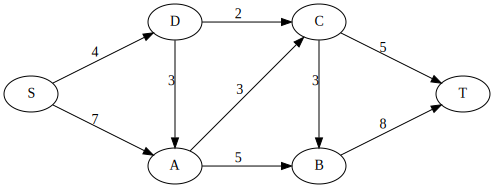

In [66]:
showAM(G, labels=labels, pos=pos)

In [72]:
def dfs(G, s, t):
    n = len(G)
    visited = [False]*n
    def _dfs(u):
        visited[u] = True
        if u == t:
            return [u], float("inf")
        else:
            for v in range(n):
                if not visited[v] and G[u, v] > 0:
                    path, bn = _dfs(v)
                    if path != None:
                        return [u] + path, min([bn, G[u, v]])
            return None, 0
    return _dfs(s)

In [73]:
import pdb
def fordFulkerson(G, s, t):
    n = len(G)
    maxflow = 0
    residual = G.copy()
    flow = np.zeros((n, n), dtype=int)
    augPath, bottleNeck = dfs(residual, s, t)
    while augPath != None:
        maxflow += bottleNeck
        for i in range(len(augPath) - 1):
            u, v = augPath[i], augPath[i + 1]
            residual[u, v] -= bottleNeck
            residual[v, u] += bottleNeck
            flow[u, v] += bottleNeck
        augPath, bottleNeck = dfs(residual, s, t)

    return maxflow, flow

10


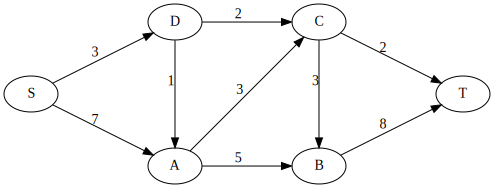

In [74]:
maxflow, flowG = fordFulkerson(G, lbl2idx['S'], lbl2idx['T'])
print(maxflow)
showAM(flowG, labels=labels, pos=pos)